# The Russia-Ukraine War Impact on Markets

In [111]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [55]:
te.login('jupyter:jupyter')

'You are logged in as a 166b11a703eb41:72239f3a1b6f4a'

# Currencies

In [103]:
currency_data = te.getHistoricalData(country=['russia', 'ukraine'],  indicator='currency',  initDate='2022-01-01', endDate='2022-07-01', output_type='df')

In [104]:
currency_data['DateTime'] = pd.to_datetime(currency_data['DateTime']).dt.date
ruble = currency_data.query(f'Country == "Russia"')
uah = currency_data.query(f'Country == "Ukraine"')

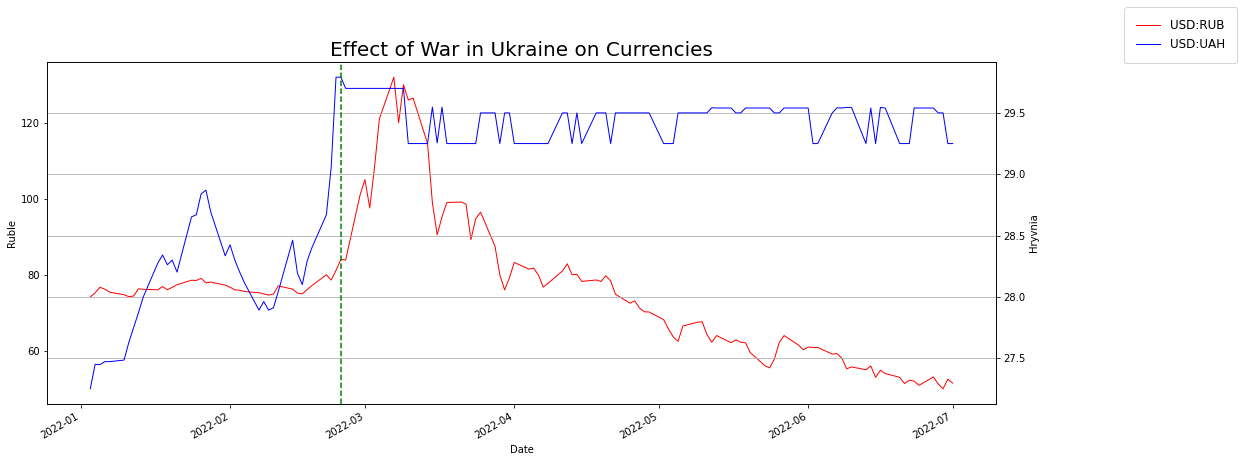

In [105]:
fig, axis_1 = plt.subplots(figsize=(17, 7))
axis_2 = axis_1.twinx()
axis_1.plot(ruble['DateTime'].values.tolist(), ruble['Value'].values.tolist(), marker='', color='red', linewidth=1, label='USD:RUB')
axis_2.plot(uah['DateTime'].values.tolist(), uah['Value'].values.tolist(), marker='', color='blue', linewidth=1, label='USD:UAH')
# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Ruble')
axis_2.set_ylabel('Hryvnia')
fig.legend(
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)

plt.grid(True)
plt.title("Effect of War in Ukraine on Currencies", size=20)
plt.gcf().autofmt_xdate()
# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='green', linestyle='--', label='War start date')
plt.show()

# Commodities

Russia's biggest exports:
* Crude Oil
* Gas
* Coal
* Wheat
* Iron
* Nickel
* Cobalt

In [112]:
commodities = {
    'XB1:COM': 'Gasoline',
    'NG1:COM': 'Natural Gas',
    'CL1:COM': 'Crude Oil'
}

In [113]:
# collect data for 2022
raw_df_22 = te.getHistorical(symbol=list(commodities.keys()), initDate='2022-01-01', output_type='df')

In [114]:
df_22 = pd.DataFrame()
df_22.index.name = 'Date'

for item in commodities:
    comm_data =  raw_df_22.loc[raw_df_22['Symbol'] == item]
    comm_closing_data = comm_data[['Date', 'Close']].rename(columns={'Close': commodities[item]})
    
    comm_closing_data.set_index('Date', inplace=True)
    comm_closing_data.index = pd.to_datetime(comm_closing_data.index, infer_datetime_format=True)
    df_22 = pd.merge(df_22, comm_closing_data, on='Date', how='outer')


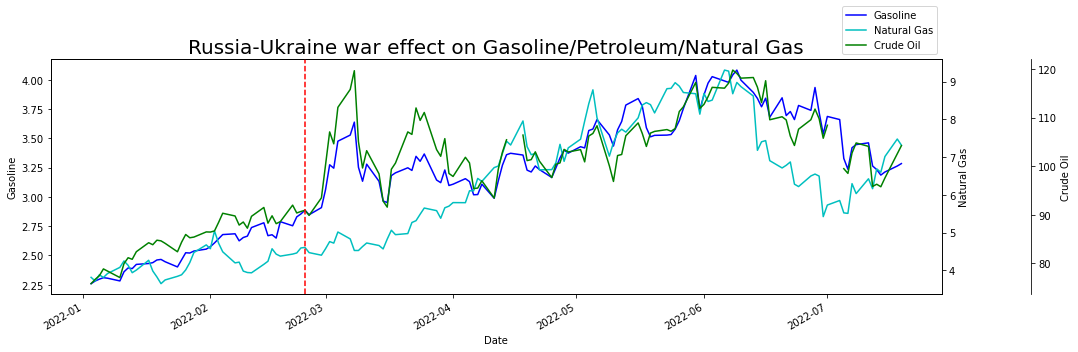

In [116]:
from helper import plot_multi
ax = plot_multi(df_22, figsize=(15, 5))
ax.set_title('Russia-Ukraine war effect on Gasoline/Petroleum/Natural Gas', color='black', size=20)
# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='red', linestyle='--')
plt.tight_layout()
